In [15]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Hold-out

Most simple way to evaluate the performance of a model is to split the data into a training and a test set. The model is trained on the training set and evaluated on the test set. This is called hold-out evaluation.

In [8]:
df = sns.load_dataset('tips')

X = df[['total_bill']]
y = df[['tip']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, pred)}")

MSE: 1.447837173927671


## LOOCV

No randomability in the data, so we can use LOOCV to get a good estimate of the generalisation performance. but it costs.

In [30]:
df = sns.load_dataset('tips')

X = df[['total_bill']]
y = df[['tip']]

loo = LeaveOneOut()
model = LinearRegression()
mse_list = []

# loo.split(X) returns the indices of the training and test sets
for train_index, test_index in loo.split(X):
    # split the data by the indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # train every time splitting the data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # calculate the MSE
    mse = np.mean((y_test - y_pred)**2) 
    mse_list.append(mse)

print(
    f"MSE (LOOCV)\n{'=' * 15}\n"
    f"Mean: {np.mean(mse_list):.3f}\n"
    f"Std: {np.std(mse_list):.3f}"
)

MSE (LOOCV)
Mean: 1.068
Std: 2.100


## k-Fold Cross Validation

Split the data into k folds. Train the model on k-1 folds and evaluate on the remaining fold. Repeat this k times. The average of the k scores is the estimate of the generalisation performance. Not that random than the hold-out method but not costy as the LOOCV. 5 - 10 used in most cases.

In [14]:
df = sns.load_dataset('tips')
X = df[['total_bill']]
y = df[['tip']]

cv = KFold(n_splits = 5, shuffle = True)
model = LinearRegression()
mse_list = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = np.mean((y_test - y_pred)**2)
    mse_list.append(mse)

print(
    f"MSE (5-fold CV)\n{'=' * 15}\n"
    f"Mean: {np.mean(mse_list):.3f}\n"
    f"Std: {np.std(mse_list):.3f}"
)

MSE (5-fold CV)
Mean: 1.097
Std: 0.292


## practice cross validation

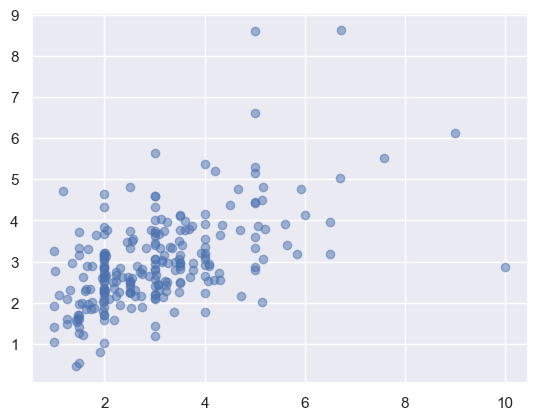

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline

sns.set()

# preprocessing
df = sns.load_dataset('tips')

# one hot encoding for categorical variables
df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = 'tip')
y = df[['tip']]

pipe = make_pipeline(
    PolynomialFeatures(degree = 2), 
    LinearRegression()
)

cv = KFold(n_splits = 5, shuffle = True)
pred = cross_val_predict(pipe, X, y, cv = cv)

plt.scatter(y, pred, alpha = 0.5)
plt.show()